In [25]:
import pandas as pd

In [26]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [27]:
insta.following()

In [28]:
insta.followers()

In [29]:
insta.get_photos()

100% [................................................................................] 8338 / 8338downloading photo:  3dprintalimsatim
100% [................................................................................] 3090 / 3090downloading photo:  boutique.takwa.femme
100% [................................................................................] 4414 / 4414downloading photo:  ataitaim
100% [................................................................................] 6255 / 6255downloading photo:  master_adam_tkd
100% [................................................................................] 4134 / 4134downloading photo:  quentinhadamamae_
100% [................................................................................] 2783 / 2783downloading photo:  brightvesselmarketing
100% [................................................................................] 4222 / 4222downloading photo:  teknomercek
100% [..............................................

In [30]:
follower = pd.read_pickle('follower.pickle')
follower.shape

(544, 6)

In [31]:
following = pd.read_pickle('following.pickle')
following.shape

(583, 6)

In [32]:
following_not_follower = [x for x in following['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

284 ['pycoders', 'raquelchircop', 'ai_machine_learning', 'chapolinsincero', 'raropizza', 'wired', 'businessweek', 'rosyfranchipasquin', 'cesarssalim', 'vtbellini', 'danovaester', 'gemudinhas', 'cosmojoseroberto', 'wilson_svieira', 'lulubasile', 'joaopiresinsta', 'claudionegon', 'danyel.fonseca', 'leticiadiasverona', 'lunacostaol', 'atatipelomundo', 'marcella_blok', 'julianasfonseca', 'jonathanavis', 'andrebastos187', 'alfredoborgesp', 'drppacheco', 'cristianacamarate', 'mianafelipe', 'ernanisouzacosta', 'marcoaur.oficial', 'jineriebetancurt', 'ysdomingues', 'dra.chrisprado', 'showdajessica', 'matheusbo', '13allan', 'raquelflinker', 'bielo_m', 'beatriz.cabral.felicidade', 'seu_hulk', 'juliopitombo', 'leandrogrisoni', 'allinetblemos', 'mnrcruz85', 'wearedefcon', 'birinasdoguana', 'isphus1973', 'filipedeschamps', 'juliacfranco', 'robertobscosta', 'gavic37', 'psicologa_julianovaes', 'julipima', 'recreiocanoas', 'canoada_vila', 'pauloalvesromao', 'martal.borges', 'raspberrypifoundation', 'm

In [33]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

226 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [34]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,295,295,295,295,295
Seguir,230,230,230,230,230
Solicitado,19,19,19,19,19


In [35]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [36]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
543,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,pad.average.dad,PaddyDaddy,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ee9...
538,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,quentinhadamamae_,Quentinha Da Mamãe,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/67d...
533,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
534,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,boutique.takwa.femme,Boutique Islamique TAKWA 👸🏽,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8ca...
536,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,rick_de_moraes,Ricardo de Moraes,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/f08...
537,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,master_adam_tkd,Master Adam TaeKwon Do ITF,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/080...
535,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,ataitaim,ATA - Artes Marciais,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6c8...
539,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,brightvesselmarketing,Bright Vessel,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/833...
540,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,teknomercek,Tekno Mercek,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/d15...
541,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,nopota_noborder,nopota,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/379...


In [37]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [38]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
582,2019-08-04 17:23:02.908421,2019-08-04 17:23:02.908421,jamilkpc,Jamil Civitarese,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/808...
581,2019-08-04 17:23:02.908421,2019-08-04 17:23:02.908421,psclmarques,Paulo Marques,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/0f3...
580,2019-08-04 17:23:02.908421,2019-08-04 17:23:02.908421,fabianabeutler,Fabiana Beutler,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/020...
579,2019-08-04 11:49:17.017046,2019-08-04 17:23:02.908421,juliana_portella,Juliana Portella Vieira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a71...
578,2019-08-03 16:31:25.281430,2019-08-04 17:23:02.908421,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
577,2019-08-03 16:31:25.281430,2019-08-04 17:23:02.908421,microsoftbr,Microsoft Brasil,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b66...
576,2019-08-03 16:31:25.281430,2019-08-04 17:23:02.908421,microsoft,Microsoft,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b95...
575,2019-08-03 10:14:15.625843,2019-08-04 17:23:02.908421,yahoofinance,Yahoo Finance,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8e6...
572,2019-08-02 21:35:40.785670,2019-08-04 17:23:02.908421,reyntiens01,Frank,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/76f...
573,2019-08-02 21:35:40.785670,2019-08-04 17:23:02.908421,semea.assaf,semea alcici assaf,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/73b...


In [39]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...


In [40]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [41]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
607,2019-07-30 10:29:44.220296,2019-08-04 17:23:02.908421,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
686,2019-07-30 10:29:44.220296,2019-08-04 17:23:02.908421,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-04 17:25:00.382049,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-04 17:25:00.382049,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
197,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
48,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,_gabicabral,,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/d5...
323,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,_gustavoayala_,Gustavo Ayala,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/91...
68,2019-07-29 22:30:54.216241,2019-08-04 17:25:00.382049,_luizpinheiro,Luiz Felipe Pinheiro,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2c...
518,2019-08-03 12:31:12.376457,2019-08-03 23:11:01.737686,_modern_sunglasses_,Modern sunglasses,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c6e...


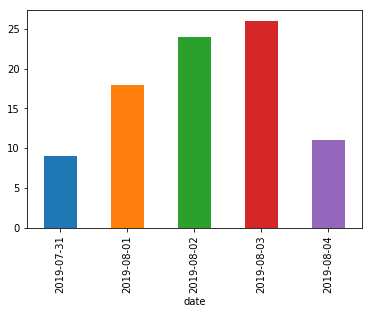

In [42]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

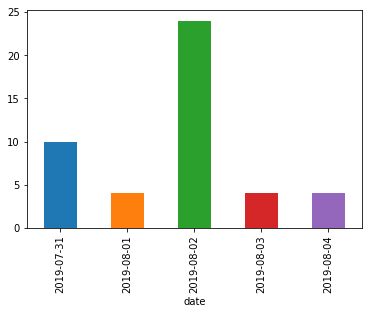

In [43]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')